# Historical Average Price Model

This notebook provides an overview of the `HistoricalAveragePriceModel` class, which calculates the average prices for the last week and the prices for a given date. The data used in this model is provided by the `CSVDataProvider` class, which reads data from a CSV file.

At present the data available ranges from 2014-12-31T23:00:00Z to 2020-09-30T23:00:00Z.

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime

sns.set(style="whitegrid")

module_path = os.path.abspath(os.path.join('../'))

if module_path not in sys.path:
    sys.path.append(module_path)

from scripts.prices import CSVDataProvider, HistoricalAveragePriceModel

%matplotlib inline

## Data Loading

First, we need to load the data. We use the `CSVDataProvider` class to read the data from a CSV file.

In [2]:
csv_file_path = os.path.join(module_path, "data", "time_series", "time_series_60min_singleindex_filtered.csv")
data_provider = CSVDataProvider(csv_file_path)
data = data_provider.get_data()

## Exploratory Data Analysis (EDA)

Let's explore the data to understand its structure and content.

In [3]:
# Display the first few rows of the data
price_data = data[['utc_timestamp','GB_GBN_price_day_ahead']]
print(price_data.head())

# Display the data types of each column
print(price_data.dtypes)

# Display the number of missing values in each column
print(price_data.isna().sum())

              utc_timestamp  GB_GBN_price_day_ahead
0 2014-12-31 23:00:00+00:00                     NaN
1 2015-01-01 00:00:00+00:00                     NaN
2 2015-01-01 01:00:00+00:00                     NaN
3 2015-01-01 02:00:00+00:00                     NaN
4 2015-01-01 03:00:00+00:00                     NaN
utc_timestamp             datetime64[ns, UTC]
GB_GBN_price_day_ahead                float64
dtype: object
utc_timestamp               0
GB_GBN_price_day_ahead    111
dtype: int64


## Data Visualization

Let's visualize the data to gain more insights.

### Distribution of GB_GBN_price_day_ahead

This plot shows the distribution of 'GB_GBN_price_day_ahead'. The histogram represents the frequency of different price levels, and the line represents the kernel density estimate.

c:\Users\koula\miniconda3\envs\OpenEnergy\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\koula\miniconda3\envs\OpenEnergy\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


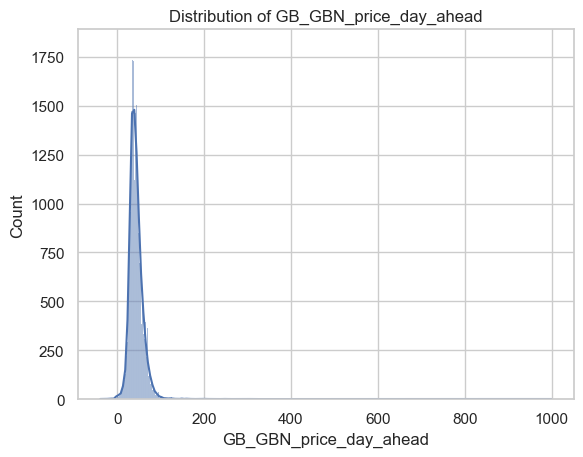

In [4]:
# Plot the distribution of 'GB_GBN_price_day_ahead'
sns.histplot(data['GB_GBN_price_day_ahead'].dropna(), kde=True)
plt.title('Distribution of GB_GBN_price_day_ahead')
plt.show()


### GB_GBN_price_day_ahead over Time

This plot shows 'GB_GBN_price_day_ahead' over time. The line represents the price at different points in time.

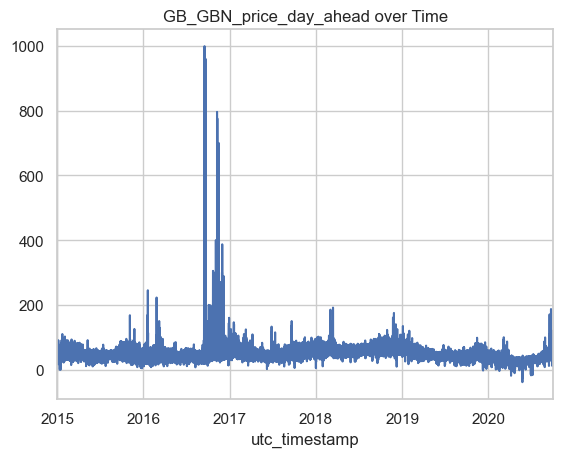

In [5]:
# Plot the 'GB_GBN_price_day_ahead' over time
data.set_index('utc_timestamp')['GB_GBN_price_day_ahead'].plot()
plt.title('GB_GBN_price_day_ahead over Time')
plt.show()

### Mean and Standard Deviation of GB_GBN_price_day_ahead by Hour

This plot shows the mean and standard deviation of 'GB_GBN_price_day_ahead' for each hour of the day. The blue line represents the mean, and the shaded area represents the standard deviation.

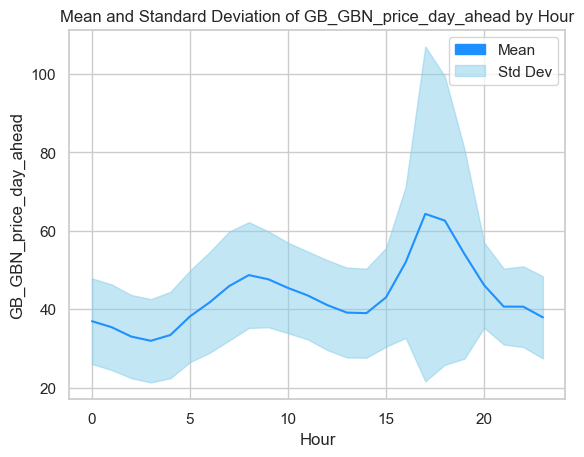

In [6]:

# Extract the hour from the 'utc_timestamp' column
data['hour'] = data['utc_timestamp'].dt.hour

# Calculate the mean and standard deviation of 'GB_GBN_price_day_ahead' for each hour
mean_prices = data.groupby('hour')['GB_GBN_price_day_ahead'].mean()
std_prices = data.groupby('hour')['GB_GBN_price_day_ahead'].std()

# Create a new DataFrame for the mean and standard deviation
price_data = pd.DataFrame({'mean': mean_prices, 'std': std_prices})

# Plot the mean and standard deviation
price_data['mean'].plot(color='dodgerblue', label='Mean')
plt.fill_between(price_data.index, price_data['mean'] - price_data['std'], price_data['mean'] + price_data['std'], color='skyblue', alpha=0.5)

# Create a legend for the mean and standard deviation
mean_patch = mpatches.Patch(color='dodgerblue', label='Mean')
std_patch = mpatches.Patch(color='skyblue', alpha=0.5, label='Std Dev')
plt.legend(handles=[mean_patch, std_patch])

plt.title('Mean and Standard Deviation of GB_GBN_price_day_ahead by Hour')
plt.xlabel('Hour')
plt.ylabel('GB_GBN_price_day_ahead')
plt.show()

## Historical Average Price Model

Now, let's use the Historical Average Price Model to analyze the data.

In [7]:
model = HistoricalAveragePriceModel(data_provider)
date = datetime.date(2020, 9, 30)  # replace with your date
average_prices_last_week, prices_current_date = model.get_prices(date)

# Display the average prices last week
print(average_prices_last_week)

# Display the prices on the current date
print(prices_current_date)

[30.854285714285716, 27.595714285714283, 25.568571428571428, 28.042857142857144, 35.57857142857143, 44.00571428571429, 49.46, 50.82285714285714, 49.26714285714286, 47.94714285714286, 44.402857142857144, 42.83571428571429, 39.57571428571429, 38.082857142857144, 38.45142857142857, 45.51, 55.94571428571429, 73.19142857142857, 66.91714285714286, 51.62, 43.107142857142854, 36.74, 38.45, 33.90857142857143]
[38.83, 35.33, 35.09, 37.12, 44.02, 52.21, 64.05, 58.27, 48.88, 46.33, 43.57, 42.0, 39.91, 40.04, 43.7, 50.12, 56.82, 67.72, 59.49, 46.55, 40.95, 34.84, 37.44, 37.44]


# Conclusion

In this notebook, we explored the `HistoricalAveragePriceModel` class and its dependencies. We performed some basic EDA on our data and used the `HistoricalAveragePriceModel` class to calculate the average prices for the last week and the prices for a given date.